In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import *

# Convolutional Neural Network

Nachdem die Klassifikation unserer Bilder mit einem einfachen Netz wahrscheinlich nicht sehr erfolgreich war, probieren wir nun ein CNN.

## Erster Versuch wieder mit MNIST

Wir starten unsere Versuche mit einem Convolutional Neural Network wieder mit dem MNIST-Datensatz - den handgeschriebenen Ziffern.

In [3]:
MNIST_path = untar_data(URLs.MNIST)
MNIST_path.ls()
data = (ImageList.from_folder(MNIST_path)
        .split_by_folder(train='training', valid='testing')
        .label_from_folder()
        .transform(size=28)
        .databunch(bs=64))

Wir erstellen das Netzwerk diesmal nicht von Grund auf, sondern nutzen eine Standard-Architektur: ein kleines Residual Network mit 18 layers namens resnet18. Dieses Netzwerk erwartet drei Channel (RGB) als Input. Der Schalter `pretrained=False` sagt, dass wir unser Netzwerk selbst trainieren möchten und nicht auf einem vortrainierten Modell aufsetzen wollen.

In [6]:
learn = cnn_learner(data, models.resnet18, pretrained=False, metrics=error_rate)

Wir trainieren das Netz mit den Standard-Einstellungen und freuen uns hoffentlich über eine Fehlerrate kleiner als 1%.

In [7]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.141837,0.217335,0.058200,00:37
1,0.085851,0.048170,0.013400,00:37
2,0.042089,0.028651,0.008300,00:37
3,0.020895,0.023651,0.007200,00:37


Wieder ein paar Beispiele für Fehlklassifikationen...

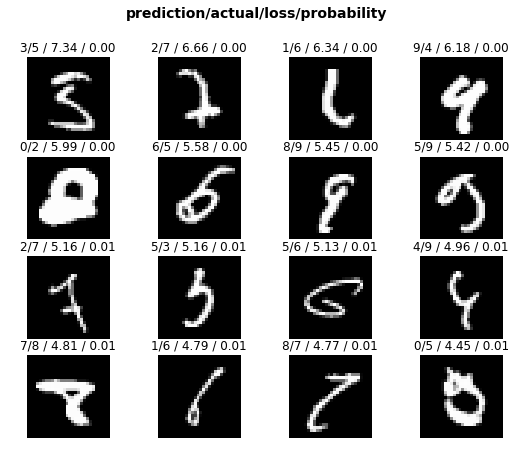

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(16, figsize=(9,7))

## Aufgaben und Ideen: eigene Bilder

1. Erstelle ein Netz, das Deine Bilder verarbeiten kann.
2. Trainiere das Netz.
3. Wie sind die Ergebnisse?
4. Was passiert wenn Du eine andere Architektur nutzt (z.B. resnet34, resnet50, vgg16_bn, densenet121)?
6. Was passiert wenn Du noch ein paar Epochen länger trainierst?